<h2>Data Structure</h2>

In [53]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
 
import csv
from pprint import pprint

In [54]:
class WineReview:
    def __init__(self, *argv):
        self.id = argv[0]
        self.country               = argv[1]
        self.description           = argv[2]
        self.designation           = argv[3]
        self.points                = self._get_number(argv[4])
        self.price                 = self._get_float(argv[5])
        self.province              = argv[6]
        self.region_1              = argv[7]
        self.region_2              = argv[8]
        self.taster_name           = argv[9]
        self.taster_twitter_handle = argv[10]
        self.title                 = argv[11]
        self.variety               = argv[12]
        self.winery                = argv[13]

    def show(self):
        pprint(vars(self))
        
    def _get_number(self, string):
        return int(string)
        
    def _get_float(self, string):
        f = float(string)
        if f == 0:
            print(f)
        return f
        

In [55]:
def load_reviews():
    f = open("wine-reviews/winemag-data-130k-v2.csv", 'rt')
    raw_data = list(csv.reader(f))
    columns = raw_data.pop(0)
    #print(columns)
    
    reviews = dict()
    errors = list()

    for row in raw_data:
        id = int(row[0])
        try:
            review = WineReview(*row)
            reviews[id] = review
        except ValueError as e:
            errors.append(id)   
    f.close()

    return reviews, errors

<h3>Dictionary with all WineReviews found in the .csv file and raw data<h3>

In [56]:
reviews, errors = load_reviews() 
total = len(errors)+len(reviews.keys())
p = (len(errors)/total)*100
print("--> cleaned type errors of {} out of {} records ({}%)".format(len(errors), total, round(p, 2)))


--> cleaned type errors of 8996 out of 129971 records (6.92%)


In [65]:
# remove price outliers
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

X = collect_value('price')
print("with outliers: ", len(X))
X = reject_outliers(X)
print("without outliers: ", len(X))

reviews_wo_outliers = dict()

for k, v in reviews.items():
    
    if v.price not in X:
        continue
    reviews_wo_outliers[k] = v
        
print(len(reviews_wo_outliers.keys()))

with outliers:  120975
without outliers:  118299
215.0
125.0
350.0
350.0
775.0
225.0
150.0
320.0
630.0
365.0
350.0
125.0
200.0
380.0
160.0
130.0
150.0
125.0
120.0
125.0
125.0
150.0
175.0
125.0
150.0
180.0
120.0
120.0
120.0
120.0
180.0
135.0
125.0
154.0
150.0
132.0
175.0
125.0
1900.0
380.0
170.0
220.0
215.0
150.0
1100.0
280.0
200.0
1200.0
195.0
125.0
1300.0
400.0
163.0
126.0
135.0
180.0
300.0
130.0
120.0
270.0
150.0
120.0
225.0
260.0
150.0
300.0
225.0
150.0
125.0
150.0
164.0
190.0
205.0
145.0
125.0
145.0
400.0
260.0
120.0
170.0
130.0
140.0
195.0
210.0
130.0
120.0
161.0
155.0
146.0
225.0
125.0
130.0
145.0
210.0
150.0
230.0
130.0
120.0
135.0
125.0
150.0
125.0
148.0
125.0
209.0
145.0
300.0
160.0
200.0
160.0
430.0
550.0
190.0
120.0
140.0
150.0
120.0
140.0
475.0
155.0
132.0
235.0
145.0
165.0
200.0
150.0
375.0
160.0
398.0
130.0
200.0
150.0
273.0
175.0
152.0
125.0
500.0
145.0
200.0
160.0
285.0
280.0
190.0
120.0
160.0
250.0
175.0
135.0
125.0
210.0
135.0
150.0
150.0
286.0
262.0
140.0
145.0
275.0

150.0
195.0
140.0
150.0
152.0
150.0
245.0
130.0
140.0
140.0
170.0
450.0
455.0
500.0
450.0
580.0
150.0
150.0
545.0
1000.0
135.0
243.0
300.0
135.0
135.0
125.0
125.0
120.0
235.0
145.0
230.0
130.0
195.0
125.0
200.0
135.0
125.0
140.0
175.0
120.0
175.0
300.0
160.0
120.0
150.0
179.0
135.0
365.0
140.0
150.0
118.0
190.0
160.0
130.0
175.0
125.0
130.0
160.0
125.0
259.0
140.0
185.0
300.0
120.0
125.0
131.0
130.0
175.0
125.0
125.0
139.0
135.0
120.0
580.0
130.0
156.0
150.0
236.0
140.0
164.0
225.0
118.0
290.0
272.0
163.0
299.0
130.0
175.0
130.0
130.0
130.0
160.0
120.0
120.0
140.0
135.0
163.0
120.0
295.0
130.0
175.0
350.0
375.0
412.0
145.0
250.0
161.0
155.0
125.0
225.0
275.0
140.0
200.0
250.0
240.0
130.0
120.0
130.0
138.0
450.0
250.0
220.0
400.0
120.0
150.0
325.0
188.0
125.0
200.0
120.0
216.0
300.0
145.0
155.0
159.0
200.0
155.0
150.0
525.0
175.0
175.0
125.0
175.0
175.0
475.0
225.0
250.0
276.0
120.0
200.0
120.0
195.0
125.0
250.0
155.0
307.0
157.0
235.0
155.0
125.0
220.0
126.0
150.0
125.0
175.0
350.0
510

<h3>Attributes of a WineReview object</h3>

In [66]:
try: 
    reviews_wo_outliers[8].show()
except KeyError:
    print("erroneous data")

{'country': 'Germany',
 'description': 'Savory dried thyme notes accent sunnier flavors of preserved '
                "peach in this brisk, off-dry wine. It's fruity and fresh, "
                'with an elegant, sprightly footprint.',
 'designation': 'Shine',
 'id': '8',
 'points': 87,
 'price': 12.0,
 'province': 'Rheinhessen',
 'region_1': '',
 'region_2': '',
 'taster_name': 'Anna Lee C. Iijima',
 'taster_twitter_handle': '',
 'title': 'Heinz Eifel 2013 Shine Gewürztraminer (Rheinhessen)',
 'variety': 'Gewürztraminer',
 'winery': 'Heinz Eifel'}


<h2>Linear Regression</h2>

In [67]:
def collect_value(attribute):
    result = list()
    for k, v in reviews_wo_outliers.items():
        result.append(vars(v)[attribute])
    
    return np.array(result)
        
    

In [68]:
X = collect_value('price')
Y = collect_value('points')

# print(len(X))
# # delete price outliers:

# def reject_outliers(data, m=2):
#     return data[abs(data - np.mean(data)) < m * np.std(data)]

# X = reject_outliers(X)
# print(len(X))



#my_array = np.column_stack((X, Y))
#print(my_array)

# training and test separation
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), Y, test_size=0.20)

#m = len(X)
print(X_train)
print(y_train)

#X = X.reshape(m, 1)
model = LinearRegression()
#model.fit(X, Y)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#y_pred = model.predict(X)

w = model.coef_[0] # parameters of model
b = model.intercept_ #intercept of model

#mse = mean_squared_error(Y, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
#r2_score = model.score(X, Y)
r2_score = model.score(X_test, y_pred)

print("coeficient: ", w)
print("intercept: ", b)

print(mse)
print(r2_score)

[[16.]
 [35.]
 [36.]
 ...
 [15.]
 [11.]
 [24.]]
[82 90 93 ... 88 87 89]
coeficient:  0.08154380065736441
intercept:  85.7476486490989
6.123765203242544
1.0


/Users/roxana/.virtualenvs/dojo3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


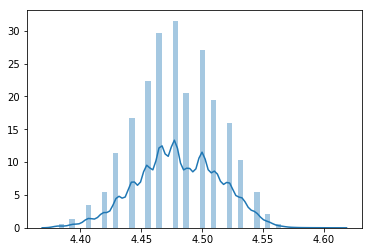

In [69]:
import seaborn as sns

sns.distplot(np.log(y_test))

117.0
5.0


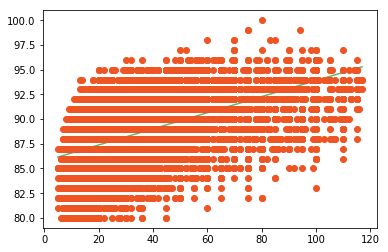

In [70]:
max_x = np.max(X_test)
min_x = np.min(X_test)

print(max_x)
print(min_x)

x = np.linspace(min_x, max_x, 1000)
y = b + w*x
plt.plot(x, y,'-', color="#58b970")
plt.plot(X_test, y_test,'o', color="#ef5423")

<h4>Using Pandas</h4>

In [58]:
data = pd.read_csv("wine-reviews/winemag-data-130k-v2.csv")
data.head(20)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [ ]:
x = data['points'].values
y = data['price'].values

# m = len(x)

# x = x.reshape(m, 1)
# model = LinearRegression()
# model.fit(x, y)

# y_pred = model.predict(x)


# mse = mean_squared_error(y, y_pred)
# rmse = np.sqrt(mse)
# r2_score = model.score(x, y)

# print(rmse)
# print(r2_score)

